# GDP understanding using Lineal Regression

Gross Domestic Product (GDP) or Producto Interno Bruto (PIB) in spanish is one of the most important metric for a country. Having a good GDP could bring benefits to the country, such as loans from world bank, increase external investments and better infrastructure. But how does it behave? What indicators affects the PBI? How can a country improve its metric? In this analysis we are trying to solve this questions, analyzing one Dataset taken from Gapminder with data from several countries, trying to find relations between different indicator and the GDP of the country using lineal regression.

## 1. Loading the Data

In [1]:
# Packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Styles for Matplotlib
plt.style.use('dark_background')

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Loading gapmander CSV file as dataframe
df = pd.read_csv("./data/gapminder_final.csv")

## 2. Understanding the data

In [4]:
# Listing Dataset dimmensions
print("Dataset dimmensions:", df.shape)
print("Number of Countries:", df.shape[0])
print("Number of Indicators:", df.shape[1])

Dataset dimmensions: (178, 16)
Number of Countries: 178
Number of Indicators: 16


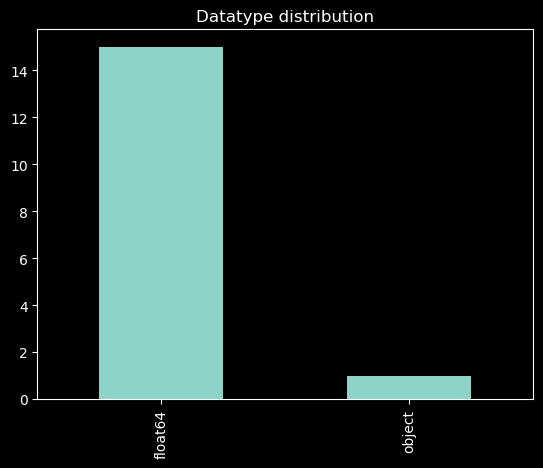

In [5]:
# Showing column types
df.dtypes.value_counts().plot.bar()
plt.title("Datatype distribution")
plt.show()

In [6]:
# Showing indicators
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')

### 2.1. Top 5 inicial Indicators

It is unknown what indicators could affect the Gross Domestic Product (PBI). Nevertheless we are going to be focus on indicator that reflects the econocic and social state of the country:

* urbanrate: Urbanization reflects the growth and dynamics of an economy, as cities often serve as centers of economic activity, innovation, and development
* co2emissions: CO2 emissions are an important indicator of a country's ecological footprint and environmental sustainability, which is relevant for both the economy and the quality of life of the population.
* Internetuserate: Access to the Internet can influence productivity, participation in the digital economy, and access to information. It can also be related to economic and social development
* lifeexpectancy: Life expectancy is a key indicator of the health and well-being of the population, which can have implications for the workforce and the economic burden on healthcare and pensions systems.
* employmentrate: The employment rate is essential for the economic well-being of the population and a country's ability to maintain a healthy economy.

In [38]:
# Showing these top 5 indicators for a sample of 5 countries
top_5_indicators = ["urbanrate", "armedforcesrate", "internetuserate", "lifeexpectancy", "employrate"]
color = {
    "incomeperperson": "#CDFAD5",
    "urbanrate": "#D2E0FB",
    "armedforcesrate": "#F9F3CC",
    "internetuserate": "#D7E5CA",
    "lifeexpectancy": "#8EACCD",
    "employrate": "#FF8080"
}
df[["country"] + top_5_indicators].sample(5)

,country,urbanrate,armedforcesrate,internetuserate,lifeexpectancy,employrate
134,Myanmar,32.58,1.912965,NaN,65.193,74.699997
56,Swaziland,24.94,NaN,9.007736,48.718,50.900002
154,Sri Lanka,15.10,2.569643,11.999971,74.941,55.099998
135,Bosnia and Herzegovina,47.44,0.462847,52.002061,75.670,41.200001
129,Denmark,86.68,1.012373,88.770254,78.826,63.099998


## 3. Univariate Analysis

### 3.1 Income per Person Univariate analysis

In [13]:
# Income per Person Percentiles
df["incomeperperson"].describe(percentiles=[.25, .5, .75, .95, .99])

count      175.000000
mean      7553.392250
std      11074.571742
min        103.775857
25%        609.744287
50%       2425.471293
75%       8880.432039
95%      32954.632381
99%      43177.953717
max      52301.587180
Name: incomeperperson, dtype: float64

Text(0.5, 1.0, 'Top Countries with bigger GPI')

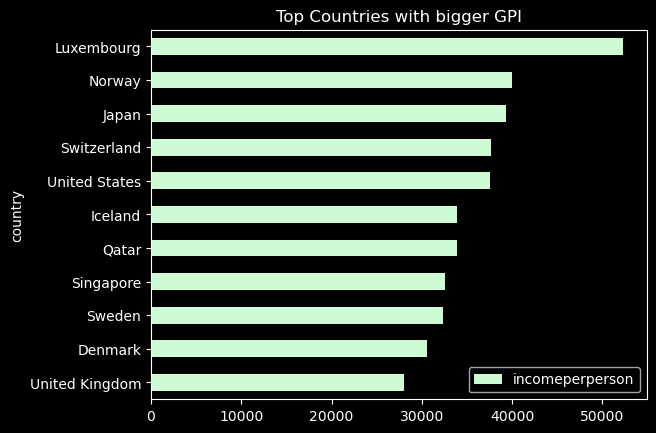

In [26]:
# Top Countries with biggest GDP
biggest_gdp_countries = df.drop_duplicates().sort_values(by="incomeperperson", ascending=False)[10::-1]
biggest_gdp_countries.plot.barh(x="country", y="incomeperperson", color=color["incomeperperson"])
plt.title("Top Countries with bigger GDP")

Text(0.5, 1.0, 'Countries with lower GPI')

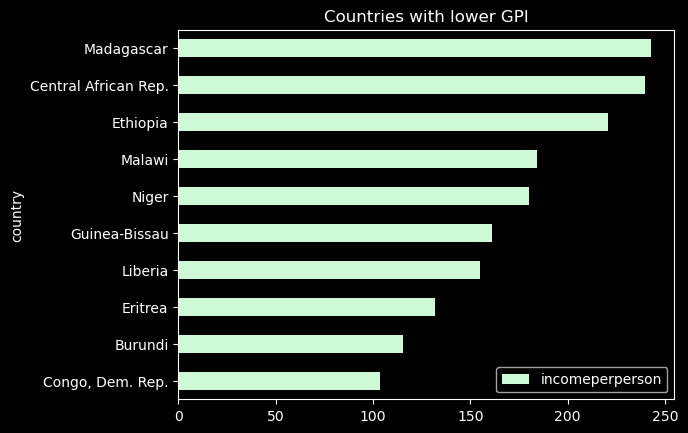

In [27]:
# Top Countries with lower GDP
lowest_gdp_countries = df.drop_duplicates().sort_values(by="incomeperperson").head(10)
lowest_gdp_countries.plot.barh(x="country", y="incomeperperson", color=color["incomeperperson"])
plt.title("Countries with lower GDP")

In order to check if the indicators we chose are the best, we are going to compare these 10 countries with the biggest GDPs and the ones with lowest GDPs. 

In [106]:
# Function that paints lines for each country according to one indicator
def paint_lines(indicator):
    for index, country in biggest_gdp_countries.iterrows():
        # Green for biggest gdp's countries
        plt.axvline(country[indicator], color='g', linestyle='dashed', linewidth=1) 
    for index, country in lowest_gdp_countries.iterrows():
        # Red for lowest gdp's countries
        plt.axvline(country[indicator], color='r', linestyle='dashed', linewidth=1)

<Axes: >

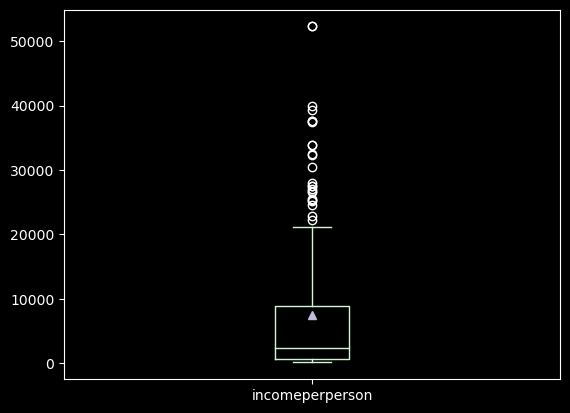

In [28]:
# Box Plot for Income per Person
df['incomeperperson'].plot.box(showmeans=True, color=color["incomeperperson"])

Most countries have GDP lower than 8880. And there in clearly a tendency to have lower GDPs, making outliers to have bigger GDPs

### 3.2 Urban rate analysis

In [102]:
# Urban rate Percentiles
df["urbanrate"].describe()

count    178.000000
mean      56.282135
std       22.561796
min       10.400000
25%       36.965000
50%       59.600000
75%       73.460000
max      100.000000
Name: urbanrate, dtype: float64

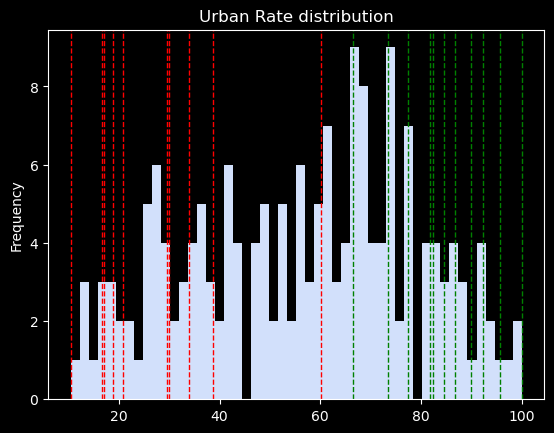

In [29]:
# Urban rate distribution
df["urbanrate"].plot.hist(bins=50, color=color["urbanrate"])
plt.title("Urban Rate distribution")
paint_lines("urbanrate")

Aparently, there is a relation between urban rate and GDP, top countries tend to be more urbanized.

### 3.3 Employment Rate Univariate Analysis

In [110]:
# Employ rate Percentiles
df['employrate'].describe()

count    177.000000
mean      58.854237
std       10.334804
min       34.900002
25%       51.400002
50%       58.799999
75%       65.000000
max       83.199997
Name: employrate, dtype: float64

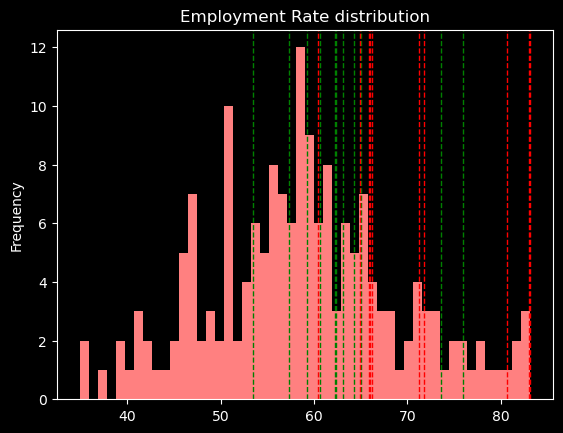

In [30]:
# Employ rate distribution
df["employrate"].plot.hist(bins=50, color=color["employrate"])
plt.title("Employment Rate distribution")
paint_lines("employrate")

No country has an employment rate bigger than 83%. It is also interesant to see that the best country in terms of employment rate is also one of the worst in terms of GDP.

### 3.4 Internet Use Rate Univariate analysis

In [142]:
# Internet use rate Percentiles
df['internetuserate'].describe()

count    174.000000
mean      34.740125
std       28.088371
min        0.210066
25%        9.924668
50%       29.939930
75%       55.973228
max       95.638113
Name: internetuserate, dtype: float64

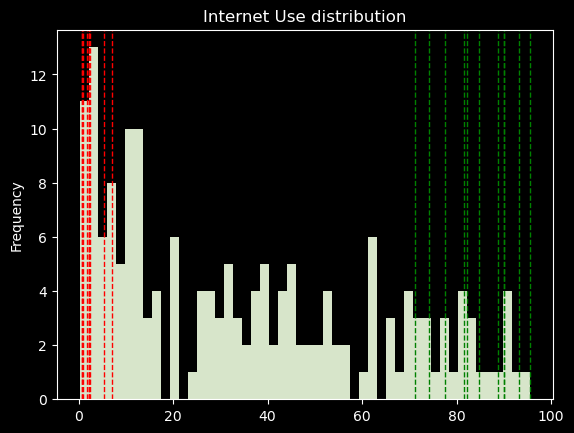

In [31]:
# Life expectancy distribution
df["internetuserate"].plot.hist(bins=50, color=color["internetuserate"])
plt.title("Internet Use distribution")
paint_lines("internetuserate")

In 2010 there was clearly a tendency for countries to not have access to internet. Apparently this impacting their GDPs.

### 3.5 Life Expectancy Univariate analysis

In [144]:
# Internet use rate Percentiles
df['lifeexpectancy'].describe()

count    178.000000
mean      69.414949
std        9.808335
min       47.794000
25%       62.725000
50%       72.974000
75%       76.127500
max       83.394000
Name: lifeexpectancy, dtype: float64

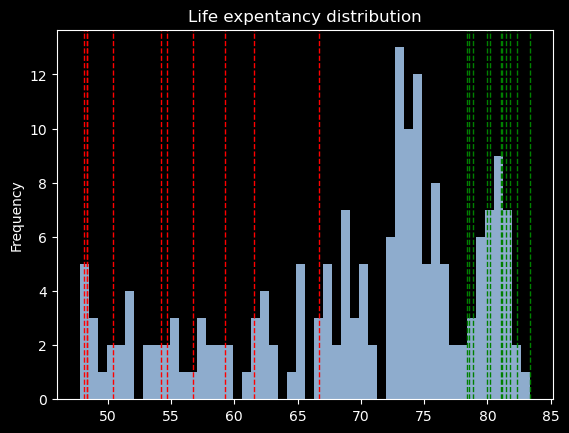

In [33]:
# Life expectancy distribution
df["lifeexpectancy"].plot.hist(bins=50, color=color["lifeexpectancy"])
plt.title("Life expentancy distribution")
paint_lines("lifeexpectancy")

On contrary to Interenet use rate, Countries tend to have higher life expentancy, this could be explained due to advancements in medicine and healt care. 

### 3.6 Armed Forces Univariate Analysis

In [9]:
# Internet use rate Percentiles
df['armedforcesrate'].describe()

count    174.000000
mean       1.376696
std        1.499729
min        0.000000
25%        0.491714
50%        0.931293
75%        1.601996
max        9.820127
Name: armedforcesrate, dtype: float64

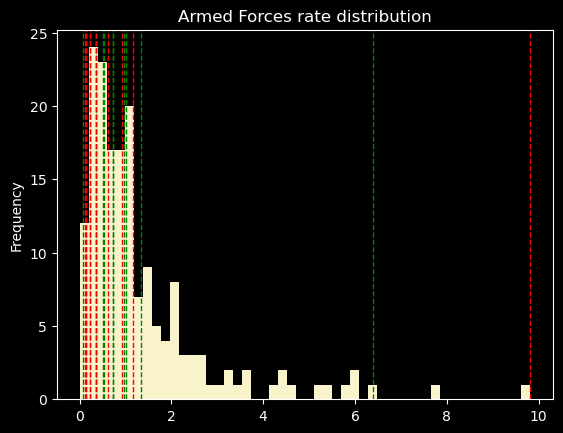

In [34]:
# Life expectancy distribution
df["armedforcesrate"].plot.hist(bins=50, color=color["armedforcesrate"])
plt.title("Armed Forces rate distribution")
paint_lines("armedforcesrate")

Most countries doesn't have more than 20% of their labor force working in military. This could be explained thanks to no recent major wars. 

# 4. Bi-variate Analysis

### 4.1 Collinearity

In order to develop a good lineal regression model we need to check if these 5 attributes doesn't have a correlation greater than 0.8.

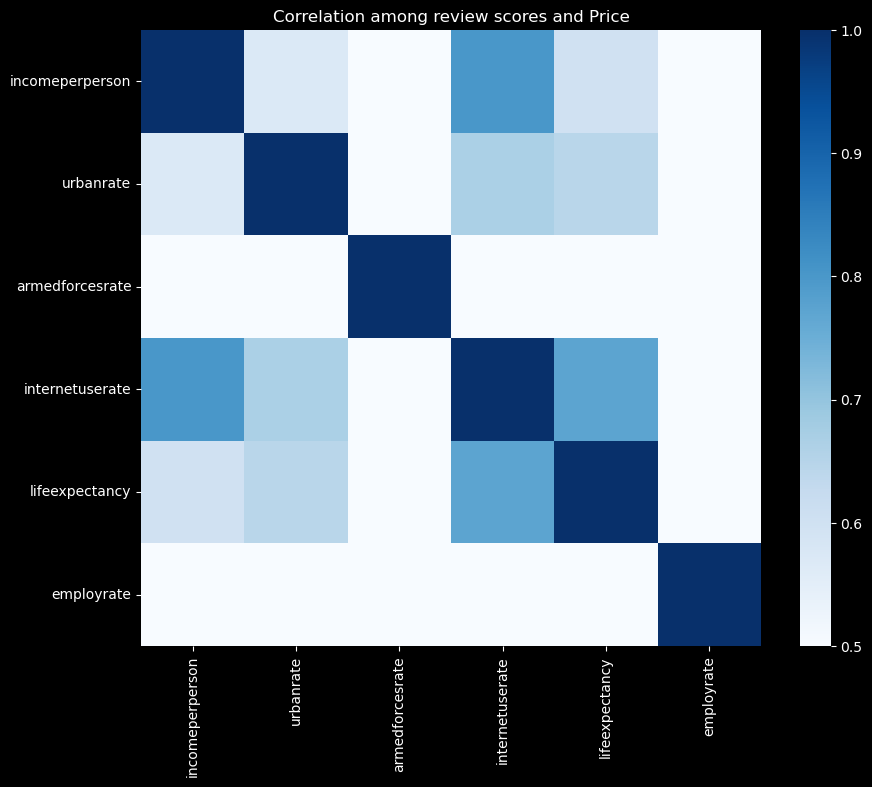

In [20]:
# Plotting correlation heatmap among indicators and gdp
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[["incomeperperson"] + top_5_indicators].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores and Price")
plt.show()

Indicators selected are not greatly correlated between each other. This means these indicators could be good features in a lineal regression model.

### 4.2 Lineality

There are some extreme outliers, we are going to remove them from the analysis.

In [81]:
# Filtering DF with no outliers
q1 = df["incomeperperson"].quantile(0.25)
q3 = df["incomeperperson"].quantile(0.75)
iqr = q3 - q1
outliers_max_factor = 1.5
df_no_outliers = df.loc[df["incomeperperson"] <= (q3 + outliers_max_factor * iqr)]

<Axes: title={'center': 'DF No Outliers'}, xlabel='incomeperperson', ylabel='internetuserate'>

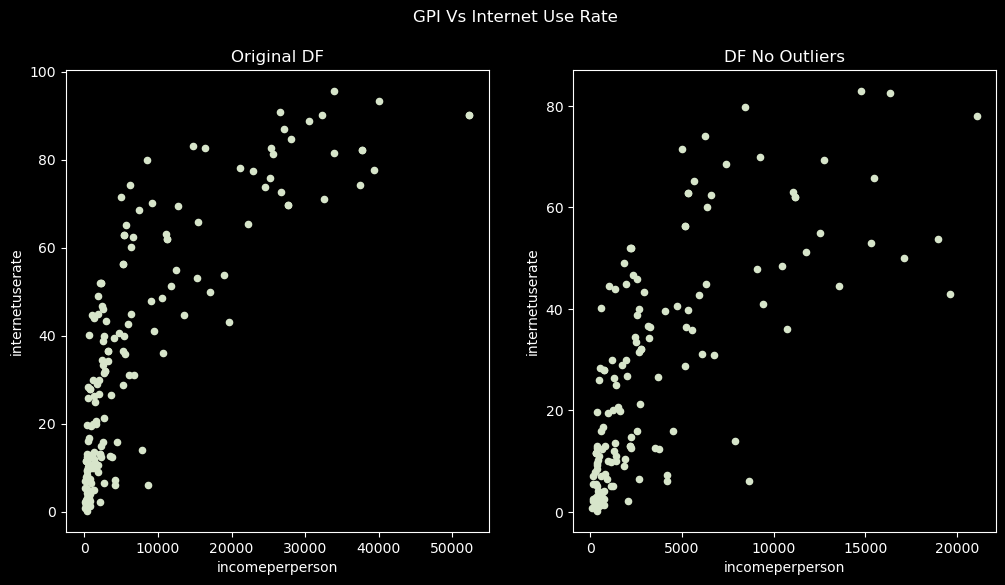

In [82]:
# GDP vs Internet use rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("GDP Vs Internet Use Rate")
df.plot.scatter(ax=axes[0], x='incomeperperson', y='internetuserate', color=color['internetuserate'])
axes[0].set_title("Original DF")
axes[1].set_title("DF No Outliers")
df_no_outliers.plot.scatter(ax=axes[1], x='incomeperperson', y='internetuserate', color=color['internetuserate'])

It shows a linear relation between incomeperperson and internetuserate.

Text(0.5, 1.0, 'GPI vs Internet Use Rate')

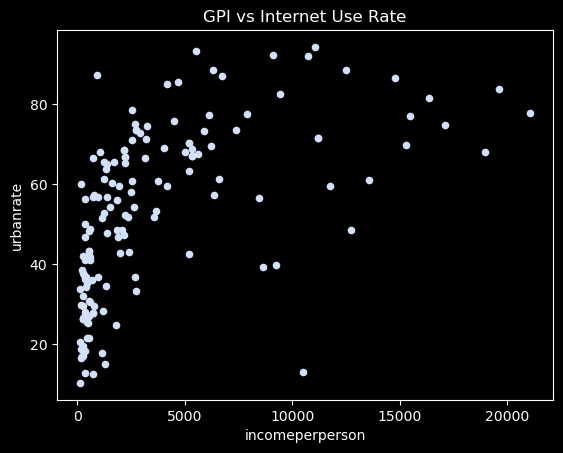

In [83]:
# GDP vs Urban rate
df_no_outliers.plot.scatter(x='incomeperperson', y='urbanrate', color=color['urbanrate'])
plt.title("GDP vs Internet Use Rate")

Text(0.5, 1.0, 'GPI vs Armed forces Rate')

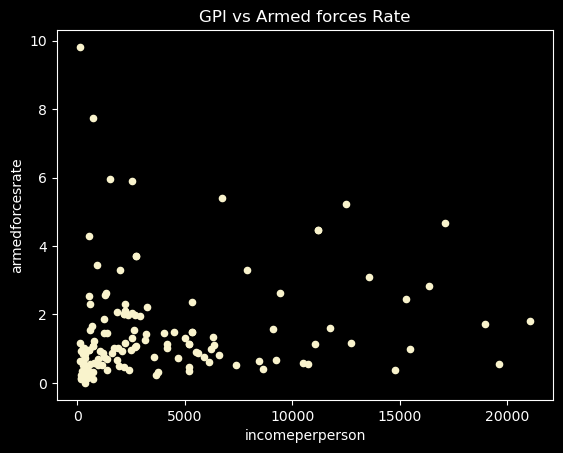

In [85]:
# GDP vs Armed Forces Rate
df_no_outliers.plot.scatter(x='incomeperperson', y='armedforcesrate', color=color['armedforcesrate'])
plt.title("GDP vs Armed forces Rate")

Text(0.5, 1.0, 'GPI vs Life Expentancy')

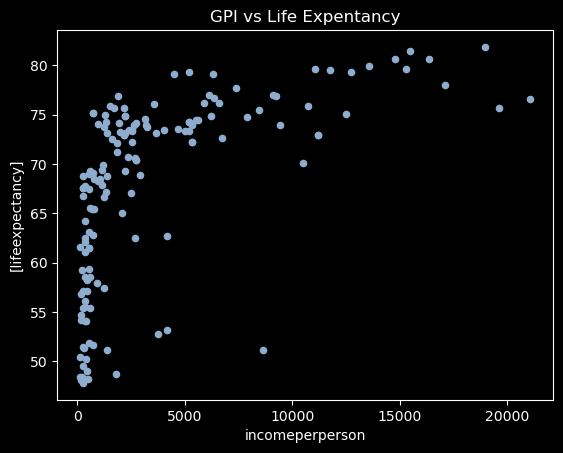

In [88]:
# GDP vs Urban rate
df_no_outliers.plot.scatter(x='incomeperperson', y=['lifeexpectancy'], color=color['lifeexpectancy'])
plt.title("GDP vs Life Expentancy")

Text(0.5, 1.0, 'GPI vs Employ Rate')

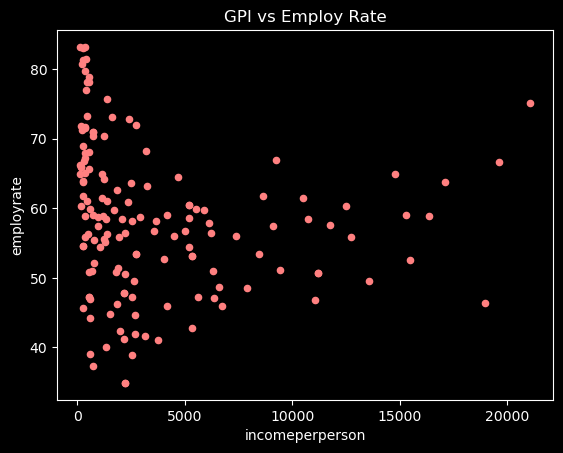

In [71]:
# GPI vs Employ rate
df_no_outliers.plot.scatter(x='incomeperperson', y='employrate', color=color['employrate'])
plt.title("GPI vs Employ Rate")

Armed forces rate and Employment rate doesn't have a lineal behaviour vs Income per person (GPI). We are going to test other indicators.

### 4.3 Testing other indicators

<Axes: title={'center': 'GPI vs Electricity Consumption Per person'}, xlabel='incomeperperson', ylabel='relectricperperson'>

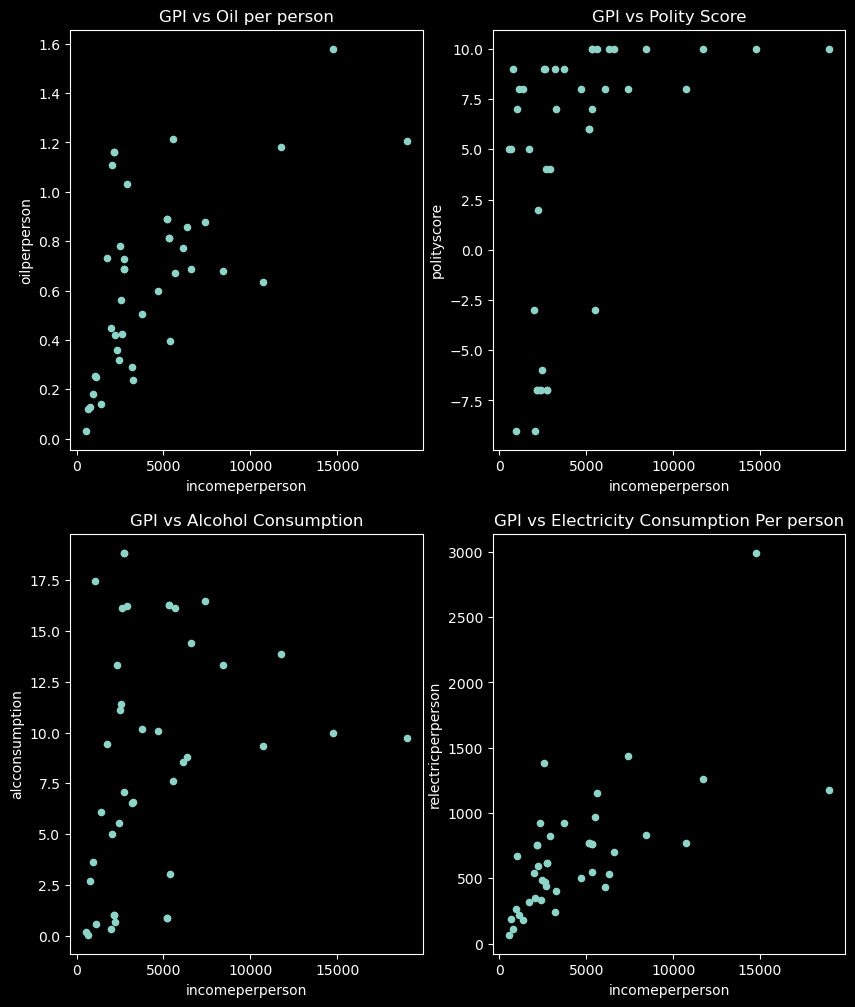

In [104]:
# GPI vs Oil Per person
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
axes[0][0].set_title("GPI vs Oil per person")
test.plot.scatter(ax=axes[0][0], x='incomeperperson', y='oilperperson')
axes[0][1].set_title("GPI vs Polity Score")
test.plot.scatter(ax=axes[0][1], x='incomeperperson', y='polityscore')
axes[1][0].set_title("GPI vs Alcohol Consumption")
test.plot.scatter(ax=axes[1][0], x='incomeperperson', y='alcconsumption')
axes[1][1].set_title("GPI vs Electricity Consumption Per person")
test.plot.scatter(ax=axes[1][1], x='incomeperperson', y='relectricperperson')


 Oil per person and Electricity Comsumption per person have a linear relation with Income per person (GPI). This could be because these indicators usually are related with more industrialization in the country. 

### 4.4 Indicators chosen based on Bi variate analysis

In [105]:
# Showing these top 5 indicators for a sample of 5 countries
top_5_indicators = ["urbanrate", "oilperperson", "internetuserate", "lifeexpectancy", "relectricperperson"]
color = {
    "incomeperperson": "#CDFAD5",
    "urbanrate": "#D2E0FB",
    "oilperperson": "#F9F3CC",
    "internetuserate": "#D7E5CA",
    "lifeexpectancy": "#8EACCD",
    "relectricperperson": "#FF8080"
}
df[["country"] + top_5_indicators].sample(5)

,country,urbanrate,oilperperson,internetuserate,lifeexpectancy,relectricperperson
137,Sweden,84.54,1.545894,90.016190,81.439,4304.514402
60,Finland,63.30,1.938654,86.898845,79.977,4036.953993
61,Senegal,42.38,NaN,15.999650,59.318,55.794744
129,Denmark,86.68,1.567527,88.770254,78.826,1884.299342
112,Kazakhstan,57.94,0.779965,33.382128,67.017,484.098988
